In [4]:
## Education Data Models

This notebook contains two models that predict educational outcomes based on instructional spend per district from 2009 to 2018. We use using publically available data by the Education Department.
The following featues are included:
- gender
- grade
- race

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [6]:
finance_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/data/districts_ccd_finance.csv")

In [7]:
finance_df.head(5)

,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_issued_FY,debt_longterm_retired_FY,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school
0,1991,100005,1.0,15048401.0,11265000.0,1012000.0,285000,413000,140000,10000,...,0.0,0,0.0,0,0.0,0,0.0,732000.0,3084.0,NaN
1,1991,100006,1.0,15048001.0,22855000.0,2009000.0,854000,671000,249000,18000,...,0.0,2000,12385000.0,0,0.0,370000,1679000.0,511000.0,6139.0,NaN
2,1991,100007,1.0,15037401.0,36812000.0,651000.0,179000,99000,286000,6000,...,44159000.0,260000,53960000.0,0,0.0,0,30420000.0,3816000.0,6328.0,NaN
3,1991,100030,1.0,15062002.0,14397000.0,1014000.0,279000,447000,136000,12000,...,5353000.0,192000,6449000.0,0,0.0,0,2005000.0,2619000.0,3783.0,NaN
4,1991,100060,1.0,15020001.0,7768000.0,948000.0,247000,295000,295000,8000,...,0.0,0,0.0,0,0.0,0,0.0,144000.0,2154.0,NaN


In [8]:
finance_df.tail(5)

,year,leaid,fips,censusid,rev_total,rev_fed_total,rev_fed_child_nutrition_act,rev_fed_state_title_i,rev_fed_state_idea,rev_fed_state_math_sci_teach,...,debt_longterm_issued_FY,debt_longterm_retired_FY,debt_longterm_outstand_end_FY,debt_shortterm_outstand_beg_FY,debt_shortterm_outstand_end_FY,assets_sinking_fund,assets_bond_fund,assets_other,enrollment_fall_responsible,enrollment_fall_school
406617,2016,5680250,56.0,5.150204e+13,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2,-2.0,-2.0,-2.0,0.0
406618,2016,5680251,56.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2,-2.0,-2.0,0.0,0.0
406619,2016,5680252,56.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2,-2.0,-2.0,0.0,0.0
406620,2016,5680253,56.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2,-2.0,-2.0,0.0,0.0
406621,2016,5680254,56.0,-2.000000e+00,-2.0,-2.0,-2,-2,-2,-2,...,-2.0,-2,-2.0,-2,-2.0,-2,-2.0,-2.0,245.0,245.0


In [9]:
print(finance_df.columns.tolist())

['year', 'leaid', 'fips', 'censusid', 'rev_total', 'rev_fed_total', 'rev_fed_child_nutrition_act', 'rev_fed_state_title_i', 'rev_fed_state_idea', 'rev_fed_state_math_sci_teach', 'rev_fed_state_drug_free', 'rev_fed_state_vocational', 'rev_fed_state_bilingual_ed', 'rev_fed_state_other', 'rev_fed_direct_impact_aid', 'rev_fed_direct_indian_ed', 'rev_fed_direct_other', 'rev_fed_arra', 'rev_fed_nonspec', 'rev_state_total', 'rev_state_gen_formula_assist', 'rev_state_special_ed', 'rev_state_transportation', 'rev_state_staff_improve', 'rev_state_compens_basic_ed', 'rev_state_vocational_ed', 'rev_state_outlay_capital_debt', 'rev_state_bilingual_ed', 'rev_state_gifted_talented', 'rev_state_sch_lunch', 'rev_state_oth_prog', 'rev_state_employee_benefits', 'rev_state_not_employee_benefits', 'rev_state_nonspec', 'rev_local_total', 'rev_local_parent_govt', 'rev_local_prop_tax', 'rev_local_sales_tax', 'rev_local_utility_tax', 'rev_local_income_tax', 'rev_local_other_tax', 'rev_local_other_sch_systems',

In [10]:
# only keep columns we are interested in
finance_df = finance_df[['year', 'leaid', 'fips', 'censusid', 'rev_total', 'exp_total', 
                                             'exp_current_instruction_total', 'enrollment_fall_responsible']]


In [11]:
print(finance_df.columns.tolist())

['year', 'leaid', 'fips', 'censusid', 'rev_total', 'exp_total', 'exp_current_instruction_total', 'enrollment_fall_responsible']


In [12]:
finance_df.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
0,1991,100005,1.0,15048401.0,11265000.0,11678000.0,6231000.0,3084.0
1,1991,100006,1.0,15048001.0,22855000.0,23682000.0,12164000.0,6139.0
2,1991,100007,1.0,15037401.0,36812000.0,39410000.0,16109000.0,6328.0
3,1991,100030,1.0,15062002.0,14397000.0,15548000.0,7557000.0,3783.0
4,1991,100060,1.0,15020001.0,7768000.0,7791000.0,4895000.0,2154.0


In [15]:
finance_df = finance_df[finance_df.year > 2008]

In [16]:
finance_df.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
258542,2009,0100002,1.0,-2.000000e+00,-2.0,-2.0,-2.0,0.0
258543,2009,0100005,1.0,1.504840e+12,38927000.0,57286000.0,20908000.0,4104.0
258544,2009,0100006,1.0,1.504800e+12,57766000.0,57101000.0,29908000.0,5777.0
258545,2009,0100007,1.0,1.503740e+12,149924000.0,152411000.0,83430000.0,12889.0
258546,2009,0100008,1.0,1.504530e+12,85030000.0,85734000.0,44662000.0,8654.0


In [19]:
directory_2009_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2009.csv", compression='gzip')
directory_2010_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2010.csv", compression='gzip')
directory_2011_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2011.csv", compression='gzip')
directory_2012_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2012.csv", compression='gzip')
directory_2013_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2013.csv", compression='gzip')
directory_2014_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2014.csv", compression='gzip')
directory_2015_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2015.csv", compression='gzip')
directory_2016_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2016.csv", compression='gzip')
directory_2017_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2017.csv", compression='gzip')
directory_2018_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_directory/school-districts_lea_directory_2018.csv", compression='gzip')

In [20]:
# missing concatenation in overall directory df
directory_df = pd.concat([directory_2009_df, directory_2010_df, directory_2011_df, directory_2012_df,
                         directory_2013_df, directory_2014_df, directory_2015_df, directory_2016_df,
                         directory_2017_df, directory_2018_df], axis=0)
directory_df.head(5)

,year,leaid,lea_name,state_leaid,street_mailing,city_mailing,state_mailing,zip_mailing,zip4_mailing,street_location,...,school_counselors_fte,teachers_ungraded_fte,spec_ed_students,english_language_learners,enrollment,cmsa,bureau_indian_education,agency_charter_indicator,migrant_students,guidance_counselors_other_fte
0,2009,100002,ALABAMA YOUTH SERVICES,210,P O BOX 66,MT MEIGS,AL,36057.0,66,1000 INDUSTRIAL SCHOOL RD,...,NaN,-2.0,43.0,0.0,0.0,NaN,0.0,3.0,NaN,-2.0
1,2009,100005,ALBERTVILLE CITY,101,107 WEST MAIN ST,ALBERTVILLE,AL,35950.0,25,107 WEST MAIN ST,...,NaN,-2.0,306.0,812.0,4104.0,NaN,0.0,3.0,NaN,-2.0
2,2009,100006,MARSHALL COUNTY,048,12380 US HIGHWAY 431 S,GUNTERSVILLE,AL,35976.0,9351,12380 US HWY 431 SOUTH,...,NaN,-2.0,792.0,380.0,5777.0,NaN,0.0,3.0,NaN,0.5
3,2009,100007,HOOVER CITY,158,2810 METROPOLITAN WAY,HOOVER,AL,35243.0,5500,2810 METROPOLITAN WAY,...,NaN,-2.0,1022.0,580.0,12889.0,NaN,0.0,3.0,NaN,-2.0
4,2009,100008,MADISON CITY,169,211 CELTIC DRIVE,MADISON,AL,35758.0,1615,211 CELTIC DR,...,NaN,-2.0,774.0,249.0,8654.0,NaN,0.0,3.0,NaN,-2.0


In [21]:
print(directory_df.columns.tolist())

['year', 'leaid', 'lea_name', 'state_leaid', 'street_mailing', 'city_mailing', 'state_mailing', 'zip_mailing', 'zip4_mailing', 'street_location', 'city_location', 'state_location', 'zip_location', 'zip4_location', 'phone', 'fips', 'agency_type', 'agency_level', 'supervisory_union_number', 'boundary_change_indicator', 'lowest_grade_offered', 'highest_grade_offered', 'number_of_schools', 'county_code', 'county_name', 'latitude', 'longitude', 'cbsa', 'cbsa_type', 'csa', 'necta', 'congress_district_id', 'state_leg_district_lower', 'state_leg_district_upper', 'urban_centric_locale', 'support_staff_other_fte', 'coordinators_fte', 'lea_admin_support_staff_fte', 'lea_administrators_fte', 'librarian_specialists_fte', 'librarian_support_staff_fte', 'instructional_aides_fte', 'school_admin_support_staff_fte', 'school_administrators_fte', 'guidance_counselors_sec_fte', 'teachers_secondary_fte', 'support_staff_students_fte', 'guidance_counselors_total_fte', 'lea_staff_total_fte', 'other_staff_fte',

In [22]:
directory_df = directory_df[['year', 'leaid', 'lea_name', 'state_leaid','state_location', 'zip_location', 'fips', 
                             'county_code', 'county_name', 'latitude', 'longitude', 'urban_centric_locale']]

In [23]:
directory_df.head(5)

,year,leaid,lea_name,state_leaid,state_location,zip_location,fips,county_code,county_name,latitude,longitude,urban_centric_locale
0,2009,100002,ALABAMA YOUTH SERVICES,210,AL,36057.0,1.0,1101.0,MONTGOMERY COUNTY,32.376999,-86.083000,41.0
1,2009,100005,ALBERTVILLE CITY,101,AL,35950.0,1.0,1095.0,MARSHALL COUNTY,34.267872,-86.208954,32.0
2,2009,100006,MARSHALL COUNTY,048,AL,35976.0,1.0,1095.0,MARSHALL COUNTY,34.306667,-86.292007,42.0
3,2009,100007,HOOVER CITY,158,AL,35243.0,1.0,1073.0,JEFFERSON COUNTY,33.406399,-86.766701,13.0
4,2009,100008,MADISON CITY,169,AL,35758.0,1.0,1089.0,MADISON COUNTY,34.688652,-86.744812,22.0


In [24]:
edfacts_2009_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2009.csv", compression='gzip')
edfacts_2010_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2010.csv", compression='gzip')
edfacts_2011_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2011.csv", compression='gzip')
edfacts_2012_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2012.csv", compression='gzip')
edfacts_2013_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2013.csv", compression='gzip')
edfacts_2014_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2014.csv", compression='gzip')
edfacts_2015_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2015.csv", compression='gzip')
edfacts_2016_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2016.csv", compression='gzip')
edfacts_2017_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_edfacts/districts_edfacts_assessments_2017.csv", compression='gzip')

In [25]:

edfacts_df = pd.concat([edfacts_2009_df, edfacts_2010_df, edfacts_2011_df, edfacts_2012_df,
                         edfacts_2013_df, edfacts_2014_df, edfacts_2015_df, edfacts_2016_df,
                         edfacts_2017_df], axis=0)
edfacts_df.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,200001,200001,2009,Lower Kuskokwim School District,2,99,99,99,99,99,...,99,99,2305.0,46.0,46.0,46.0,2297.0,37.0,37.0,37.0
1,200001,200001,2009,Lower Kuskokwim School District,2,99,5,99,99,99,...,99,99,2190.0,44.0,44.0,44.0,2182.0,35.0,35.0,35.0
2,200001,200001,2009,Lower Kuskokwim School District,2,99,4,99,99,99,...,99,99,9.0,50.0,100.0,75.0,9.0,50.0,100.0,75.0
3,200001,200001,2009,Lower Kuskokwim School District,2,99,2,99,99,99,...,99,99,4.0,-3.0,-3.0,-3.0,4.0,-3.0,-3.0,-3.0
4,200001,200001,2009,Lower Kuskokwim School District,2,99,99,99,99,99,...,99,99,321.0,14.0,14.0,14.0,321.0,13.0,13.0,13.0


In [26]:
print(edfacts_df.columns.tolist())

['leaid', 'leaid_num', 'year', 'lea_name', 'fips', 'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt']


In [27]:
edfacts_df = edfacts_df[['leaid', 'leaid_num', 'year', 'lea_name', 'fips', 'grade_edfacts', 'race', 'sex', 'lep', 
                         'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 
                         'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 
                         'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 
                         'math_test_pct_prof_high', 'math_test_pct_prof_midpt']]

### Not sure we need enrollment df when race is included in edfacts (I'm using it, but calling it out)

In [29]:
enrollment_2009_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2009.csv", compression='gzip')
enrollment_2010_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2010.csv", compression='gzip')
enrollment_2011_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2011.csv", compression='gzip')
enrollment_2012_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2012.csv", compression='gzip')
enrollment_2013_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2013.csv", compression='gzip')
enrollment_2014_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2014.csv", compression='gzip')
enrollment_2015_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2015.csv", compression='gzip')
enrollment_2016_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2016.csv", compression='gzip')
enrollment_2017_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2017.csv", compression='gzip')
enrollment_2018_df = pd.read_csv("/Users/marianabecerril/Documents/ds_bootcamp/projects/final_project/educationdata/district_enrollment/schools_ccd_lea_enrollment_2018.csv", compression='gzip')

In [30]:

enroll_df = pd.concat([enrollment_2009_df, enrollment_2010_df, enrollment_2011_df, enrollment_2012_df,
                         enrollment_2013_df, enrollment_2014_df, enrollment_2015_df, enrollment_2016_df,
                         enrollment_2017_df, enrollment_2018_df], axis=0)
enroll_df.head(5)

,year,leaid,fips,grade,race,sex,enrollment
0,2009,100002,1,3,1,1,0.0
1,2009,100002,1,3,1,2,0.0
2,2009,100002,1,3,1,99,0.0
3,2009,100002,1,3,2,1,0.0
4,2009,100002,1,3,2,2,0.0


In [31]:
print(enroll_df.columns.tolist())

['year', 'leaid', 'fips', 'grade', 'race', 'sex', 'enrollment']


In [32]:
# merging directory, edfacts
master_temp_df = pd.merge(directory_df, edfacts_df)

In [33]:
# merging (directory, edfacts) with enroll
master_temp2_df = pd.merge(master_temp_df, enroll_df)

In [37]:
master_df = pd.merge(master_temp2_df, finance_df)

In [35]:
print(master_df.columns.tolist())

['year', 'leaid', 'lea_name', 'state_leaid', 'state_location', 'zip_location', 'fips', 'county_code', 'county_name', 'latitude', 'longitude', 'urban_centric_locale', 'leaid_num', 'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt', 'grade', 'enrollment', 'censusid', 'rev_total', 'exp_total', 'exp_current_instruction_total', 'enrollment_fall_responsible']


In [48]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

## OLS Model for Reading proficiency only (math excluded)

In [51]:
# X = inputs for prediction; Y = what we are predicting
master_df_cleaned = master_df.dropna()
x = master_df_cleaned[['enrollment', 'exp_current_instruction_total']]
y = master_df_cleaned['read_test_pct_prof_high']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     read_test_pct_prof_high   R-squared:                       0.005
Model:                                 OLS   Adj. R-squared:                  0.005
Method:                      Least Squares   F-statistic:                 4.575e+04
Date:                     Sat, 16 Jan 2021   Prob (F-statistic):               0.00
Time:                             10:29:23   Log-Likelihood:            -8.4557e+07
No. Observations:                 16764230   AIC:                         1.691e+08
Df Residuals:                     16764227   BIC:                         1.691e+08
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            42.0667      0.010   4325.192      0.000      42.048      42.086
enrollment                     -3.11e-05   4.91e-06     -6.330      0.000   -4.07e-05   -2.15e-05
exp_current_instruction_total  4.464e-08   1.57e-10    284.570      0.000    4.43e-08    4.49e-08
==============================================================================
Omnibus:                178199555.214   Durbin-Watson:                   0.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1347782.937
Skew:                           0.064   Prob(JB):                         0.00
Kurtosis:                       1.617   Cond. No.                     7.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# getting one single year to better understand how the model is working
finance_2015_df = finance_df[finance_df.year == 2015]

In [54]:
# getting one single year to better understand how the model is working
finance_2015_df.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
369234,2015,0100002,1.0,-2.000000e+00,-1.0,-1.0,-1.0,-1.0
369235,2015,0100005,1.0,1.504840e+12,49795000.0,46778000.0,24173000.0,5214.0
369236,2015,0100006,1.0,1.504800e+12,56422000.0,64739000.0,27425000.0,5635.0
369237,2015,0100007,1.0,1.503740e+12,168040000.0,165436000.0,91782000.0,13910.0
369238,2015,0100008,1.0,1.504530e+12,105927000.0,101154000.0,55315000.0,10011.0


In [55]:
# getting one single year to better understand how the model is working
edfacts_2015_df.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,2592.0,33.0,33.0,33.0,2638.0,42.0,42.0,42.0
1,100005,100005,2015,Albertville City,1,99,5,99,99,99,...,99,99,4.0,-3.0,-3.0,-3.0,5.0,-3.0,-3.0,-3.0
2,100005,100005,2015,Albertville City,1,99,4,99,99,99,...,99,99,12.0,50.0,100.0,75.0,12.0,50.0,100.0,75.0
3,100005,100005,2015,Albertville City,1,99,2,99,99,99,...,99,99,73.0,15.0,19.0,17.0,74.0,20.0,24.0,22.0
4,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,159.0,6.0,9.0,7.5,159.0,15.0,19.0,17.0


In [80]:
# keeping only 99, which are totals
edfacts_2015_race_df = edfacts_2015_df[(edfacts_2015_df['race']== 99) 
                                       & (edfacts_2015_df['sex']== 99)
                                       & (edfacts_2015_df['lep']== 99)
                                      & (edfacts_2015_df['homeless']== 99)
                                      & (edfacts_2015_df['migrant']== 99)
                                      & (edfacts_2015_df['disability']== 99)
                                      & (edfacts_2015_df['econ_disadvantaged']== 99)
                                      & (edfacts_2015_df['foster_care']== 99)
                                      & (edfacts_2015_df['military_connected']== 99) 
                                       & (edfacts_2015_df['grade_edfacts']== 99)]

# 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected',

In [81]:
edfacts_2015_race_df.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,2592.0,33.0,33.0,33.0,2638.0,42.0,42.0,42.0
107,100006,100006,2015,Marshall County,1,99,99,99,99,99,...,99,99,2987.0,33.0,33.0,33.0,3003.0,39.0,39.0,39.0
207,100007,100007,2015,Hoover City,1,99,99,99,99,99,...,99,99,7315.0,58.0,58.0,58.0,7356.0,66.0,66.0,66.0
301,100008,100008,2015,Madison City,1,99,99,99,99,99,...,99,99,5449.0,67.0,67.0,67.0,5482.0,72.0,72.0,72.0
405,100011,100011,2015,Leeds City,1,99,99,99,99,99,...,99,99,1018.0,33.0,33.0,33.0,1024.0,37.0,37.0,37.0


In [140]:
# removing all negative entries, which means data is supressed (-1), not applicable (-2), or missing (-3)
# we are only focusing on districts w/ over 100 students
finance_2015_clean_df1 = finance_2015_df[(finance_2015_df['rev_total'] > 0) 
                                       & (finance_2015_df['exp_total'] > 0)
                                       & (finance_2015_df['exp_current_instruction_total']> 0)
                                      & (finance_2015_df['enrollment_fall_responsible'] > 100)]

In [141]:
finance_2015_clean_df1.head(5)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
369235,2015,0100005,1.0,1.504840e+12,49795000.0,46778000.0,24173000.0,5214.0
369236,2015,0100006,1.0,1.504800e+12,56422000.0,64739000.0,27425000.0,5635.0
369237,2015,0100007,1.0,1.503740e+12,168040000.0,165436000.0,91782000.0,13910.0
369238,2015,0100008,1.0,1.504530e+12,105927000.0,101154000.0,55315000.0,10011.0
369240,2015,0100011,1.0,1.503710e+12,27699000.0,32285000.0,9932000.0,1905.0


In [142]:
finance_2015_clean_df1.sort_values(by = 'enrollment_fall_responsible', ascending=True)

,year,leaid,fips,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible
383755,2015,4200048,42.0,-2.000000e+00,1.915000e+06,1.930000e+06,7.950000e+05,101.0
385642,2015,4822620,48.0,4.452440e+13,1.616000e+06,1.508000e+06,8.280000e+05,101.0
383219,2015,4016320,40.0,3.750210e+13,1.031000e+06,1.151000e+06,5.880000e+05,101.0
372236,2015,1100102,11.0,-2.000000e+00,2.702000e+06,5.514000e+06,1.050000e+06,101.0
385198,2015,4801404,48.0,-2.000000e+00,1.980000e+06,1.793000e+06,9.130000e+05,101.0
...,...,...,...,...,...,...,...,...
379018,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0
372256,2015,1200390,12.0,1.050130e+13,3.590773e+09,3.654722e+09,2.055410e+09,357579.0
373084,2015,1709930,17.0,1.450162e+13,5.272668e+09,5.963039e+09,3.612722e+09,387311.0
371138,2015,0622710,6.0,5.501906e+12,1.032938e+10,9.686165e+09,4.949740e+09,639337.0


In [143]:
edfacts_2015_clean_df1.head(5)

,leaid,leaid_num,year,lea_name,fips,grade_edfacts,race,sex,lep,homeless,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,100005,100005,2015,Albertville City,1,99,99,99,99,99,...,99,99,2592.0,33.0,33.0,33.0,2638.0,42.0,42.0,42.0
107,100006,100006,2015,Marshall County,1,99,99,99,99,99,...,99,99,2987.0,33.0,33.0,33.0,3003.0,39.0,39.0,39.0
207,100007,100007,2015,Hoover City,1,99,99,99,99,99,...,99,99,7315.0,58.0,58.0,58.0,7356.0,66.0,66.0,66.0
301,100008,100008,2015,Madison City,1,99,99,99,99,99,...,99,99,5449.0,67.0,67.0,67.0,5482.0,72.0,72.0,72.0
405,100011,100011,2015,Leeds City,1,99,99,99,99,99,...,99,99,1018.0,33.0,33.0,33.0,1024.0,37.0,37.0,37.0


In [144]:
# removing all negative entries, which means data is supressed (-1), not applicable (-2), or missing (-3)
edfacts_2015_clean_df1 = edfacts_2015_race_df[(edfacts_2015_race_df['read_test_pct_prof_low'] > 0) 
                                       | (edfacts_2015_race_df['read_test_pct_prof_high'] > 0)
                                       | (edfacts_2015_race_df['read_test_pct_prof_midpt']> 0)
                                      | (edfacts_2015_race_df['math_test_pct_prof_low'] > 0)
                                      | (edfacts_2015_race_df['math_test_pct_prof_high'] > 0)
                                      | (edfacts_2015_race_df['math_test_pct_prof_midpt'] > 0)]

In [145]:
df_2015_clean = pd.merge(finance_2015_clean_df1, edfacts_2015_clean_df1, on = "leaid", how = "inner")

In [146]:
df_2015_clean.head(50)

,year_x,leaid,fips_x,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,leaid_num,year_y,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
0,2015,2635550,26.0,2.350031e+13,34126000.0,31529000.0,16274000.0,2944.0,2635550,2015,...,99,99,1459.0,54.0,54.0,54.0,1454.0,50.0,50.0,50.0
1,2015,2635730,26.0,2.350331e+13,6999000.0,7559000.0,3083000.0,561.0,2635730,2015,...,99,99,316.0,49.0,49.0,49.0,317.0,38.0,38.0,38.0
2,2015,2635820,26.0,2.350630e+13,81985000.0,69036000.0,38251000.0,5498.0,2635820,2015,...,99,99,2920.0,59.0,59.0,59.0,2937.0,46.0,46.0,46.0
3,2015,2635850,26.0,2.350650e+13,23275000.0,21264000.0,11214000.0,2021.0,2635850,2015,...,99,99,1062.0,52.0,52.0,52.0,1063.0,37.0,37.0,37.0
4,2015,2635910,26.0,2.350705e+13,89727000.0,90620000.0,49645000.0,6925.0,2635910,2015,...,99,99,3586.0,61.0,61.0,61.0,3598.0,43.0,43.0,43.0
5,2015,2635940,26.0,2.350385e+13,30853000.0,29467000.0,19120000.0,2946.0,2635940,2015,...,99,99,1539.0,56.0,56.0,56.0,1539.0,38.0,38.0,38.0
6,2015,2635970,26.0,2.350250e+13,13991000.0,13862000.0,6872000.0,1357.0,2635970,2015,...,99,99,506.0,21.0,21.0,21.0,506.0,5.0,5.0,5.0
7,2015,2636060,26.0,2.350621e+13,11123000.0,10025000.0,5955000.0,990.0,2636060,2015,...,99,99,527.0,49.0,49.0,49.0,529.0,22.0,22.0,22.0
8,2015,2636120,26.0,2.350750e+13,8726000.0,8780000.0,5019000.0,750.0,2636120,2015,...,99,99,407.0,44.0,44.0,44.0,405.0,32.0,32.0,32.0
9,2015,2636270,26.0,2.350580e+13,7011000.0,6356000.0,3641000.0,682.0,2636270,2015,...,99,99,368.0,60.0,60.0,60.0,368.0,45.0,45.0,45.0


In [147]:
print(df_2015_clean.columns.tolist())

['year_x', 'leaid', 'fips_x', 'censusid', 'rev_total', 'exp_total', 'exp_current_instruction_total', 'enrollment_fall_responsible', 'leaid_num', 'year_y', 'lea_name', 'fips_y', 'grade_edfacts', 'race', 'sex', 'lep', 'homeless', 'migrant', 'disability', 'econ_disadvantaged', 'foster_care', 'military_connected', 'read_test_num_valid', 'read_test_pct_prof_low', 'read_test_pct_prof_high', 'read_test_pct_prof_midpt', 'math_test_num_valid', 'math_test_pct_prof_low', 'math_test_pct_prof_high', 'math_test_pct_prof_midpt']


In [148]:
df_2015_clean_dropna = df_2015_clean.dropna()

In [149]:
print(df_2015_clean_dropna)

      year_x    leaid  fips_x      censusid    rev_total    exp_total  \
0       2015  2635550    26.0  2.350031e+13   34126000.0   31529000.0   
1       2015  2635730    26.0  2.350331e+13    6999000.0    7559000.0   
2       2015  2635820    26.0  2.350630e+13   81985000.0   69036000.0   
3       2015  2635850    26.0  2.350650e+13   23275000.0   21264000.0   
4       2015  2635910    26.0  2.350705e+13   89727000.0   90620000.0   
...      ...      ...     ...           ...          ...          ...   
2883    2015  3620700    36.0  3.350360e+13  284187000.0  264371000.0   
2884    2015  3620760    36.0  3.350320e+13   33555000.0   26661000.0   
2885    2015  3620790    36.0  3.350550e+13   18782000.0   17694000.0   
2886    2015  3620820    36.0  3.350320e+13  150776000.0  143396000.0   
2887    2015  3620850    36.0  3.350320e+13   75774000.0   64133000.0   

      exp_current_instruction_total  enrollment_fall_responsible  leaid_num  \
0                        16274000.0         

In [150]:
# X = inputs for prediction; Y = what we are predicting
x = df_2015_clean_dropna['exp_current_instruction_total']
y = df_2015_clean_dropna['read_test_pct_prof_high']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     read_test_pct_prof_high   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     6.595
Date:                     Sat, 16 Jan 2021   Prob (F-statistic):             0.0103
Time:                             12:16:43   Log-Likelihood:                -12597.
No. Observations:                     2888   AIC:                         2.520e+04
Df Residuals:                         2886   BIC:                         2.521e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            55.7728      0.380    146.714      0.000      55.027      56.518
exp_current_instruction_total -1.997e-08   7.78e-09     -2.568      0.010   -3.52e-08   -4.72e-09
==============================================================================
Omnibus:                       30.985   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.056
Skew:                          -0.209   Prob(JB):                     4.90e-07
Kurtosis:                       2.741   Cond. No.                     5.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

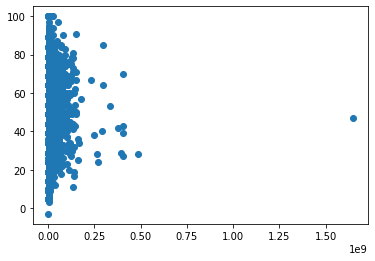

In [151]:
plt.scatter(df_2015_clean_dropna['exp_current_instruction_total'], df_2015_clean_dropna['read_test_pct_prof_high'])

In [152]:
#check the outlier and drop it
df_2015_clean_dropna.sort_values(by='exp_current_instruction_total', ascending=False)


,year_x,leaid,fips_x,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,leaid_num,year_y,...,foster_care,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt
1536,2015,3200060,32.0,2.950020e+13,3.220684e+09,3.081183e+09,1.646168e+09,325990.0,3200060,2015,...,99,99,161103.0,47.0,47.0,47.0,170450.0,37.0,37.0,37.0
2332,2015,3500060,35.0,3.250010e+13,1.021201e+09,1.037039e+09,4.835850e+08,90566.0,3500060,2015,...,99,99,57578.0,28.0,28.0,28.0,56780.0,21.0,21.0,21.0
1475,2015,3174820,31.0,2.850280e+13,6.870930e+08,7.292990e+08,4.055140e+08,51966.0,3174820,2015,...,99,99,25821.0,70.0,70.0,70.0,26131.0,55.0,55.0,55.0
2556,2015,3605850,36.0,3.320150e+13,9.950560e+08,9.366220e+08,4.040190e+08,33345.0,3605850,2015,...,99,99,14032.0,27.0,27.0,27.0,14136.0,27.0,27.0,27.0
351,2015,2721240,27.0,2.450270e+13,7.167990e+08,7.832920e+08,4.027750e+08,36793.0,2721240,2015,...,99,99,16529.0,43.0,43.0,43.0,16273.0,44.0,44.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,2015,3306900,33.0,3.050100e+13,2.543000e+06,2.089000e+06,4.900000e+05,134.0,3306900,2015,...,99,99,31.0,60.0,69.0,64.5,31.0,50.0,59.0,54.5
184,2015,2700390,27.0,-2.000000e+00,1.597000e+06,1.517000e+06,4.860000e+05,151.0,2700390,2015,...,99,99,68.0,55.0,59.0,57.0,68.0,70.0,74.0,72.0
801,2015,2912720,29.0,2.650530e+13,1.172000e+06,1.111000e+06,4.620000e+05,101.0,2912720,2015,...,99,99,46.0,50.0,59.0,54.5,46.0,30.0,39.0,34.5
793,2015,2912480,29.0,2.650360e+13,1.311000e+06,1.131000e+06,4.530000e+05,116.0,2912480,2015,...,99,99,45.0,90.0,100.0,95.0,45.0,70.0,79.0,74.5


In [153]:
df_2015_clean_drop_outlier = df_2015_clean_dropna[df_2015_clean_dropna['exp_current_instruction_total'] < float('1.646168e+09')]

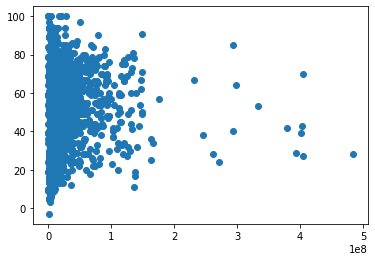

In [154]:
plt.scatter(df_2015_clean_drop_outlier['exp_current_instruction_total'], df_2015_clean_drop_outlier['read_test_pct_prof_high'])

In [155]:
# create new column with per capita instructional expenditure per student
df_2015_clean_drop_outlier['instructional_exp_per_student'] = df_2015_clean_drop_outlier['exp_current_instruction_total'] / df_2015_clean_drop_outlier['enrollment_fall_responsible']

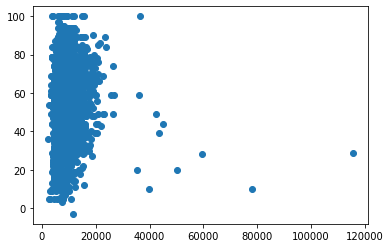

In [156]:
plt.scatter(df_2015_clean_drop_outlier['instructional_exp_per_student'], df_2015_clean_drop_outlier['read_test_pct_prof_high'])

In [157]:
# what we see here -1.0 is not really a negative number it is $100M

In [158]:
df_2015_clean_drop_outlier['enrollment_fall_responsible'].describe()

count     2887.000000
mean      2001.310010
std       4090.836292
min        101.000000
25%        344.000000
50%        805.000000
75%       2061.500000
max      90566.000000
Name: enrollment_fall_responsible, dtype: float64

In [159]:

df_2015_clean_drop_outlier.sort_values(by = 'enrollment_fall_responsible', ascending=True)

,year_x,leaid,fips_x,censusid,rev_total,exp_total,exp_current_instruction_total,enrollment_fall_responsible,leaid_num,year_y,...,military_connected,read_test_num_valid,read_test_pct_prof_low,read_test_pct_prof_high,read_test_pct_prof_midpt,math_test_num_valid,math_test_pct_prof_low,math_test_pct_prof_high,math_test_pct_prof_midpt,instructional_exp_per_student
945,2015,2922470,29.0,2.651060e+13,1.609000e+06,1.608000e+06,856000.0,101.0,2922470,2015,...,99,49.0,40.0,49.0,44.5,50.0,50.0,59.0,54.5,8475.247525
1447,2015,3172910,31.0,2.850820e+13,2.565000e+06,2.539000e+06,1554000.0,101.0,3172910,2015,...,99,48.0,80.0,89.0,84.5,48.0,60.0,69.0,64.5,15386.138614
801,2015,2912720,29.0,2.650530e+13,1.172000e+06,1.111000e+06,462000.0,101.0,2912720,2015,...,99,46.0,50.0,59.0,54.5,46.0,30.0,39.0,34.5,4574.257426
1191,2015,3008880,30.0,2.750320e+13,1.635000e+06,1.607000e+06,809000.0,101.0,3008880,2015,...,99,64.0,35.0,39.0,37.0,64.0,30.0,34.0,32.0,8009.900990
192,2015,2700403,27.0,-2.000000e+00,1.555000e+06,1.945000e+06,768000.0,102.0,2700403,2015,...,99,61.0,40.0,44.0,42.0,59.0,20.0,29.0,24.5,7529.411765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,2015,3172840,31.0,2.850551e+13,4.999400e+08,5.453110e+08,293743000.0,39842.0,3172840,2015,...,99,20162.0,85.0,85.0,85.0,20211.0,77.0,77.0,77.0,7372.697154
2113,2015,3411340,34.0,3.100000e+13,1.143241e+09,1.160380e+09,393799000.0,40889.0,3411340,2015,...,99,20682.0,29.0,29.0,29.0,20457.0,20.0,20.0,20.0,9630.927633
1475,2015,3174820,31.0,2.850280e+13,6.870930e+08,7.292990e+08,405514000.0,51966.0,3174820,2015,...,99,25821.0,70.0,70.0,70.0,26131.0,55.0,55.0,55.0,7803.448409
1549,2015,3200480,32.0,2.950160e+13,6.613690e+08,6.673840e+08,334037000.0,66504.0,3200480,2015,...,99,35586.0,53.0,53.0,53.0,34875.0,45.0,45.0,45.0,5022.810658


In [160]:
# X = inputs for prediction; Y = what we are predicting
x = df_2015_clean_drop_outlier['exp_current_instruction_total']
y = df_2015_clean_drop_outlier['read_test_pct_prof_high']
x = sm.add_constant(x)
est = sm.OLS(y, x).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     read_test_pct_prof_high   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                  0.003
Method:                      Least Squares   F-statistic:                     9.314
Date:                     Sat, 16 Jan 2021   Prob (F-statistic):            0.00229
Time:                             12:27:10   Log-Likelihood:                -12591.
No. Observations:                     2887   AIC:                         2.519e+04
Df Residuals:                         2885   BIC:                         2.520e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            55.9731      0.398    140.729      0.000      55.193      56.753
exp_current_instruction_total -3.186e-08   1.04e-08     -3.052      0.002   -5.23e-08   -1.14e-08
==============================================================================
Omnibus:                       31.185   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.527
Skew:                          -0.213   Prob(JB):                     3.88e-07
Kurtosis:                       2.749   Cond. No.                     4.29e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

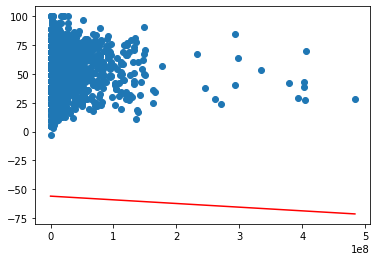

In [161]:
x = df_2015_clean_drop_outlier['exp_current_instruction_total'].tolist() 
y = df_2015_clean_drop_outlier['read_test_pct_prof_high'].tolist() 
plt.scatter(x, y) 
  
# finding the maximum and minimum 
# values of x, to get the 
# range of data 
max_x = df_2015_clean_drop_outlier['exp_current_instruction_total'].max() 
min_x = df_2015_clean_drop_outlier['read_test_pct_prof_high'].min() 
  
# range of values for plotting 
# the regression line 
x = np.arange(min_x, max_x, 1) 
  
# the substituted equation 
y = -3.186e-08 * x - 55.9731
  
# plotting the regression line 
plt.plot(y, 'r') 
plt.show() 

## Open questions:
- I'm failing to add race. Not sure what needs to be done before I can use it since it is a categorical variable
- Need to decide on the features we want (correlation amongst them?)

In [ ]:
covariance = cov(data1, data2)
print(covariance)